<br>
<br>
<font size=6>ROC-AUC</font>
<br>
<br>
<br>
<b>ROC - Reсeiver Operating Characteristic (рабочая характеристика приёмника)</b><br>
<b>AUC или area under curve - площадь под кривай ROC</b>
<br>
<br>
<center>Матрица ошибок:</center>
<br>

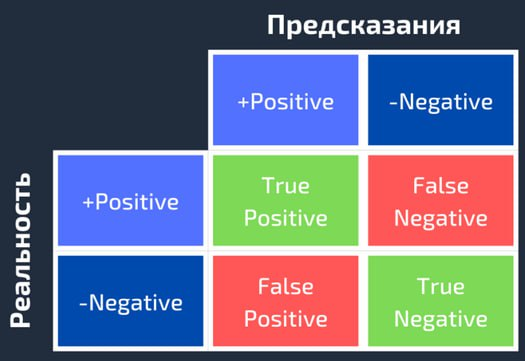

<br><br>
С помощью <i>матрицы ошибок</i> мы можем получить множество характеристик, основанных на процентных соотношениях:<br><br>
 - <b>True Positive Rate (TPR) либо Recall (полнота)</b> показывает, какой процент среди всех <i>positive</i> верно предсказан моделью.<br>
   $TPR = \frac{TP}{TP + FN}$ <br>
   <br><br>
 - <b>False Positive Rate (FPR)</b> показывает, какой процент среди всех <i>negative</i> неверно предсказан модель.<br>
   $FPR = \frac{FP}{FP + TN}$ <br>
   <br><br>
 - <b>Precision (точность)</b> показывает процент правильных прогнозов в общем количестве прогнозов положительного класса.<br>
   $P = \frac{TP}{TP+FP}$ <br>
   <br><br>
   
<center><font size=5>ROC-кривая</font></center>
<br>

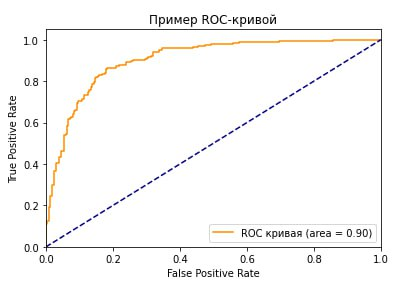
<br><br><br>
ROC - отношение TPR к FPR<br>
AUC - площадь по кривой ROC<br>
Пунктирная линия - если бы positive и negative выбирались случайным образом<br>
<br>
<br>
<font size=4><b>Как выбрать оптимальную точку на кривой ROC?</b></font>
<br><br>
Нужно выбирать наиболее подходящее пороговое значение, учитывая сферу применения модели.<br>
Однако общее правило - максимизировать разницу (TPR - FPR)<br><br>

LogsiticRegression: ROC AUC = 0.903


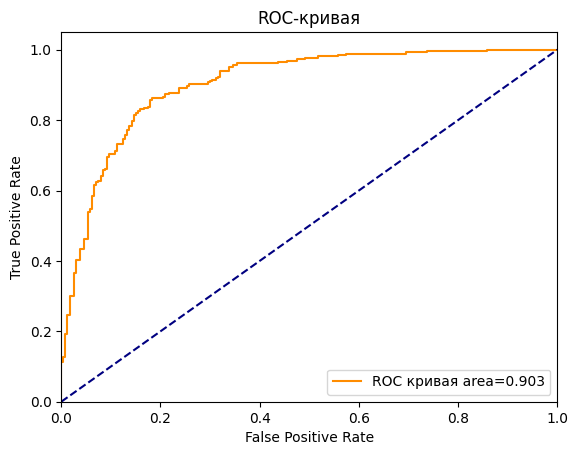

In [31]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# получаем вероятности
lr_probs = model.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print(f"LogsiticRegression: ROC AUC = {lr_auc:.3}")
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC кривая area={roc_auc:.3}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая")
plt.legend(loc='lower right')
plt.show()